# Test Table Extraction Quality

Detect tables

In [36]:
from pyprojroot.here import here
from gmft.pdf_bindings import PyPDFium2Document
from gmft import CroppedTable, AutoTableDetector 

detector = AutoTableDetector()

def ingest_pdf(pdf_path) -> list[CroppedTable]:
    doc = PyPDFium2Document(pdf_path)

    tables = []
    for page in doc:
        tables += detector.extract(page)
    return tables, doc

tables, doc = ingest_pdf(here("src/data/raw/pdf/test1.pdf"))
print(f"Number of tables detected: {len(tables)}")

Number of tables detected: 2


Visualize table recognition

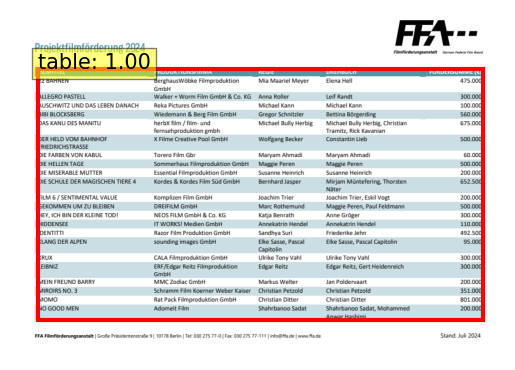

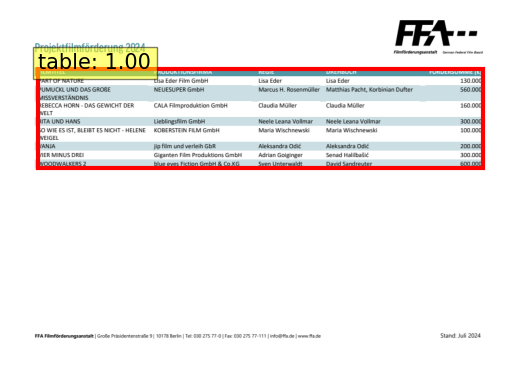

In [37]:
for table in tables:
    table.visualize(figsize = None)

Visualize row & column recognition

Invoking large table row guess! set TATRFormatConfig.force_large_table_assumption to False to disable this.


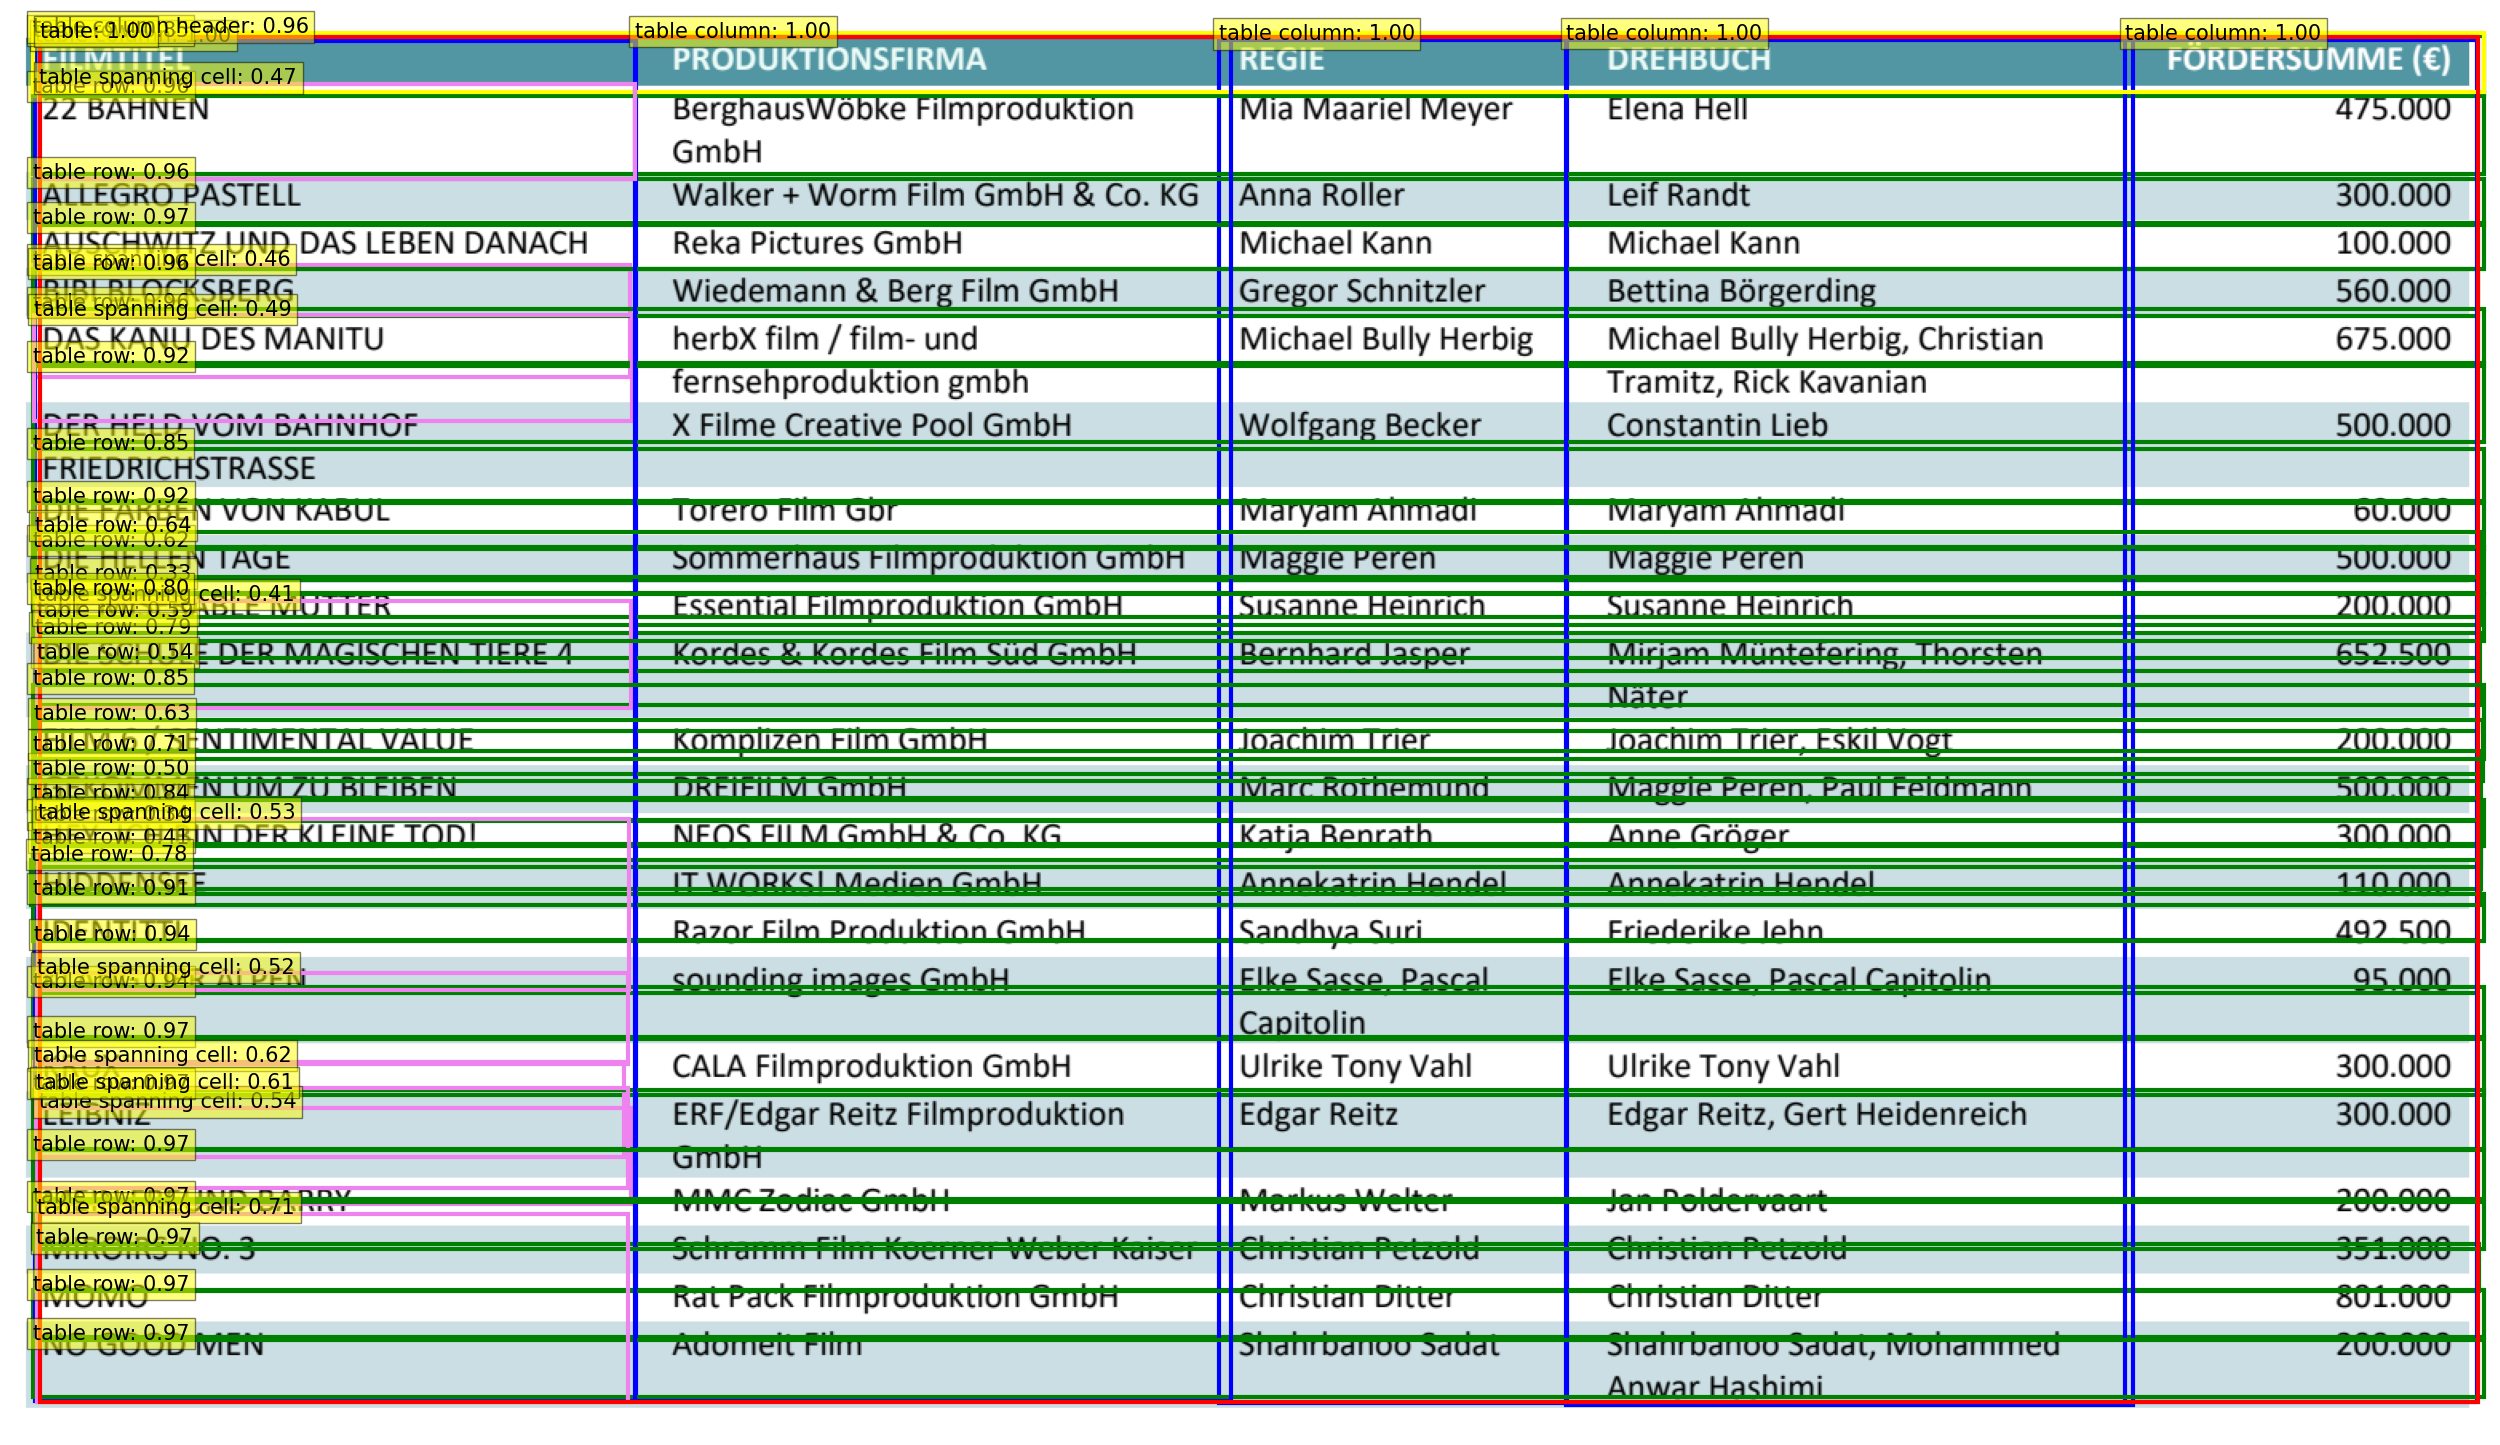

In [39]:
from gmft import AutoTableFormatter, AutoFormatConfig

formatter = AutoTableFormatter()
ft = formatter.extract(tables[0])
ft.visualize()

The result as a dataframe

In [40]:
ft.df()

,FILMTITEL,PRODUKTIONSFIRMA,REGIE,DREHBUCH,FÖRDERSUMME (€)
0,22 BAHNEN,BerghausWöbke Filmproduktion,Mia Maariel Meyer,Elena Hell,475.000
1,None,GmbH,None,None,None
2,ALLEGRO PASTELL,Walker + Worm Film GmbH & Co. KG,Anna Roller,Leif Randt,300.000
3,AUSCHWITZ UND DAS LEBEN DANACH,Reka Pictures GmbH,Michael Kann,Michael Kann,100.000
4,BIBI BLOCKSBERG,Wiedemann & Berg Film GmbH,Gregor Schnitzler,Bettina Börgerding,560.000
5,DAS KANU DES MANITU,herbX film / film- und,Michael Bully Herbig,"Michael Bully Herbig, Christian",675.000
6,None,fernsehproduktion gmbh,None,"Tramitz, Rick Kavanian",None
7,DER HELD VOM BAHNHOF,X Filme Creative Pool GmbH,Wolfgang Becker,Constantin Lieb,500.000
8,FRIEDRICHSTRASSE,None,None,None,None
9,DIE FARBEN VON KABUL,Torero Film Gbr,Maryam Ahmadi,Maryam Ahmadi,60.000


Has a hard time dealing with multi-line rows caused by word wrapping. Disabling the large table assumption algo in the config makes it worse:

In [41]:
config_overrides = AutoFormatConfig(force_large_table_assumption = False)
ft.df(config_overrides = config_overrides)


,FILMTITEL,PRODUKTIONSFIRMA,REGIE,DREHBUCH,FÖRDERSUMME (€)
0,22 BAHNEN,BerghausWöbke Filmproduktion GmbH,Mia Maariel Meyer,Elena Hell,475.000
1,ALLEGRO PASTELL,Walker + Worm Film GmbH & Co. KG,Anna Roller,Leif Randt,300.000
2,AUSCHWITZ UND DAS LEBEN DANACH,Reka Pictures GmbH,Michael Kann,Michael Kann,100.000
3,BIBI BLOCKSBERG,Wiedemann & Berg Film GmbH,Gregor Schnitzler,Bettina Börgerding,560.000
4,DAS KANU DES MANITU,herbX film / film- und,Michael Bully Herbig,"Michael Bully Herbig, Christian",675.000
5,DER HELD VOM BAHNHOF,fernsehproduktion gmbh X Filme Creative Pool GmbH,Wolfgang Becker,"Tramitz, Rick Kavanian Constantin Lieb",500.000
6,FRIEDRICHSTRASSE,None,None,None,None
7,DIE FARBEN VON KABUL,Torero Film Gbr,Maryam Ahmadi,Maryam Ahmadi,60.000
8,DIE HELLEN TAGE,Sommerhaus Filmproduktion GmbH,Maggie Peren,Maggie Peren,500.000
9,DIE MISERABLE MUTTER,Essential Filmproduktion GmbH,Susanne Heinrich,Susanne Heinrich,200.000


Some data is now assigned to the wrong cells. So best stick to the standard algo and postprocess it looking for `none` values.

Let's try another PDF:

In [42]:
tables2, doc2 = ingest_pdf(here("src/data/raw/pdf/test2.pdf"))
print(f"Number of tables detected: {len(tables2)}")

Number of tables detected: 4


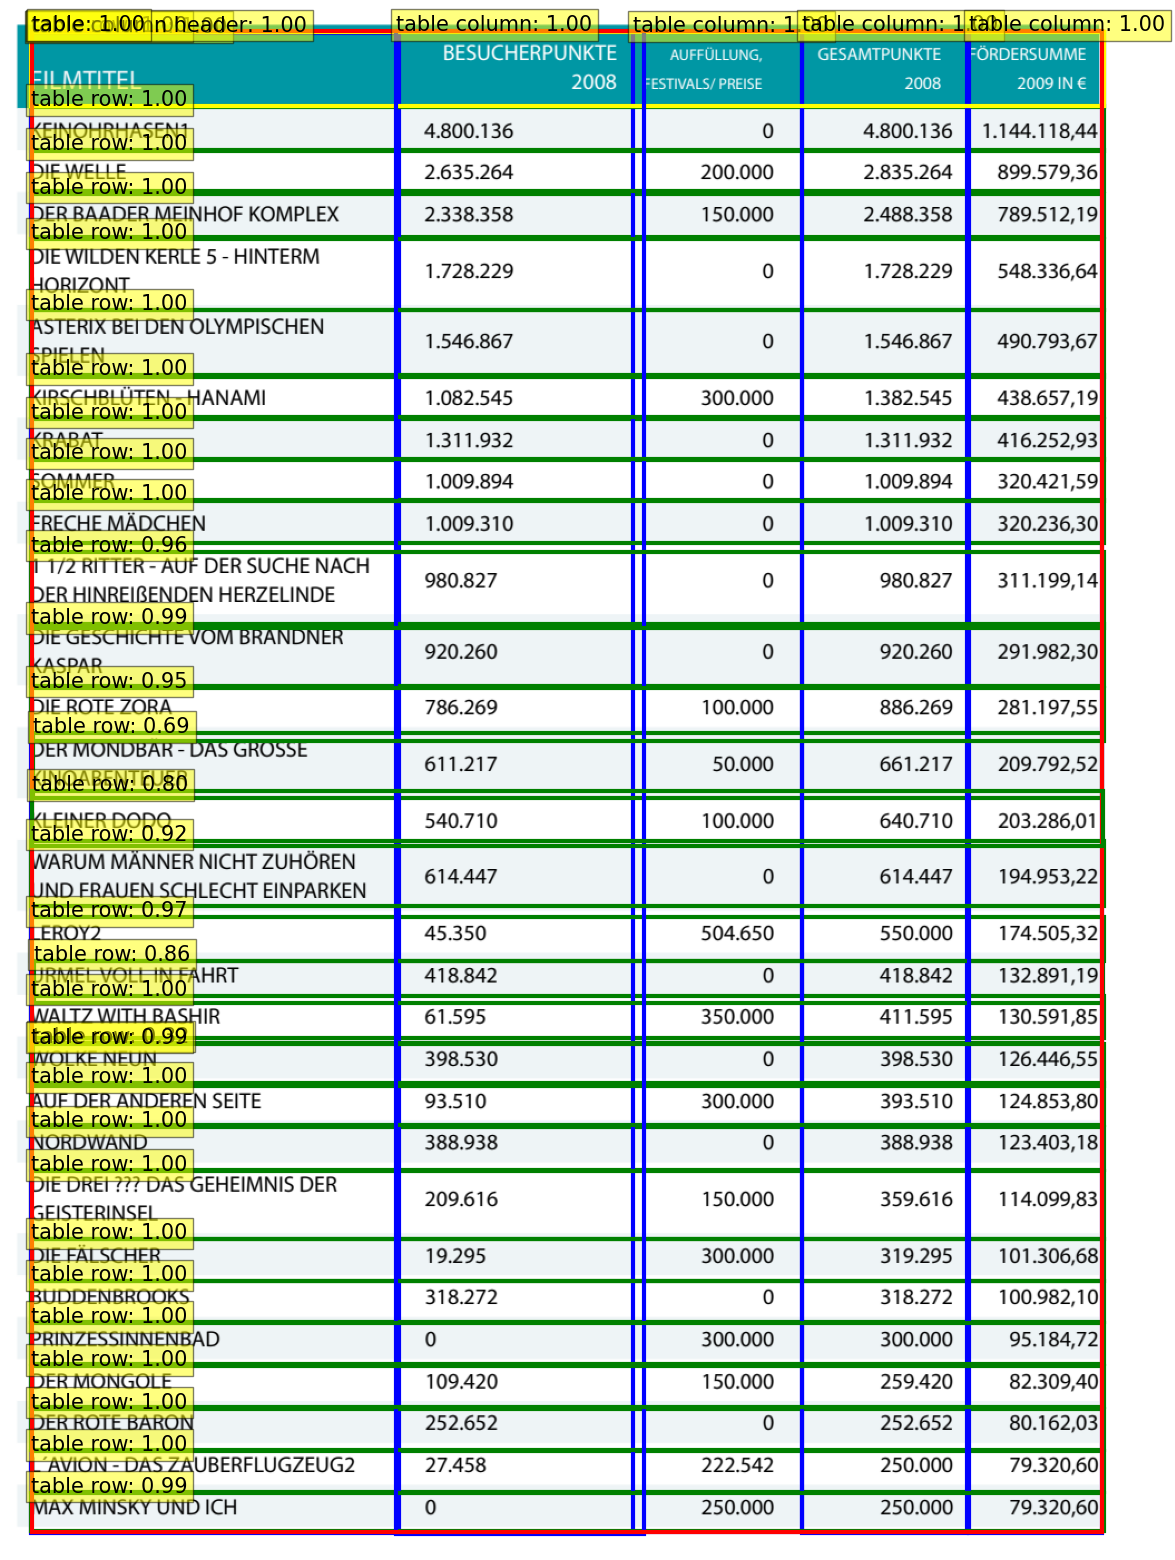

In [43]:
ft2 = formatter.extract(tables2[0])
ft2.visualize()

Confidence is quite low on some cells (again with word wrapping, this time centered).

In [44]:
ft2.df()

,FILMTITEL,BESUCHERPUNKTE 2008,"AUFFÜLLUNG, FESTIVALS/ PREISE",GESAMTPUNKTE 2008,FÖRDERSUMME 2009 IN €
0,KEINOHRHASEN1,4.800.136,0,4.800.136,"1.144.118,44"
1,DIE WELLE,2.635.264,200.000,2.835.264,"899.579,36"
2,DER BAADER MEINHOF KOMPLEX,2.338.358,150.000,2.488.358,"789.512,19"
3,DIE WILDEN KERLE 5 - HINTERM HORIZONT,1.728.229,0,1.728.229,"548.336,64"
4,ASTERIX BEI DEN OLYMPISCHEN SPIELEN,1.546.867,0,1.546.867,"490.793,67"
5,KIRSCHBLÜTEN - HANAMI,1.082.545,300.000,1.382.545,"438.657,19"
6,KRABAT,1.311.932,0,1.311.932,"416.252,93"
7,SOMMER,1.009.894,0,1.009.894,"320.421,59"
8,FRECHE MÄDCHEN,1.009.310,0,1.009.310,"320.236,30"
9,1 1/2 RITTER - AUF DER SUCHE NACH DER HINREIßE...,980.827,0,980.827,"311.199,14"


This time, the default config leads to wrong cell attribution in one case. Slightly increasing the `_nms_overlap_threshold` config option from 0.1 to 0.15 (or even 0.11) does the trick here.

In [45]:
config_overrides2 = AutoFormatConfig(_nms_overlap_threshold = 0.15)
ft2.df(config_overrides = config_overrides2)

,FILMTITEL,BESUCHERPUNKTE 2008,"AUFFÜLLUNG, FESTIVALS/ PREISE",GESAMTPUNKTE 2008,FÖRDERSUMME 2009 IN €
0,KEINOHRHASEN1,4.800.136,0,4.800.136,"1.144.118,44"
1,DIE WELLE,2.635.264,200.000,2.835.264,"899.579,36"
2,DER BAADER MEINHOF KOMPLEX,2.338.358,150.000,2.488.358,"789.512,19"
3,DIE WILDEN KERLE 5 - HINTERM HORIZONT,1.728.229,0,1.728.229,"548.336,64"
4,ASTERIX BEI DEN OLYMPISCHEN SPIELEN,1.546.867,0,1.546.867,"490.793,67"
5,KIRSCHBLÜTEN - HANAMI,1.082.545,300.000,1.382.545,"438.657,19"
6,KRABAT,1.311.932,0,1.311.932,"416.252,93"
7,SOMMER,1.009.894,0,1.009.894,"320.421,59"
8,FRECHE MÄDCHEN,1.009.310,0,1.009.310,"320.236,30"
9,1 1/2 RITTER - AUF DER SUCHE NACH DER HINREIßE...,980.827,0,980.827,"311.199,14"


In short: `gmft` seems to do a remarkable job at extracting tables. Just remember to increase `_nms_overlap_threshold` slightly. In some cases you'll still need to post-process the result and merge rows. Correct attribution can probably be inferred by looking for `none` values in other columns.